In [84]:
from schellingmob import SchellingAgent, SchellingModel
import math
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd

def distance(p, q, type="euclid"):
    if type=="euclid":
        return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)
    
side = 50
dists=[]

for i in range(25):
    for k in range(25):
        dists.append(distance((0,0), (i,k)))
        
meandfc = sum(dists)/len(dists)

jaccard = pd.DataFrame({"alpha": [],
                        "beta": [],
                        "union": [], 
                       "outliers":[],
                       "candidates":[]})
jaccard

,alpha,beta,union,outliers,candidates


In [ ]:
for alfabeta in [(0,0), (0,-2), (2,0), (2,-2), (3,-3)]:
    for run in range(10):
        city = SchellingModel(side = side, density=.7,
                                  mobility={"model":"gravity", "alpha":alfabeta[0], "beta":alfabeta[1]},
                                  agents_report=True,
                                  town=True)

        city.datacollect()
        while city.running and city.schedule.steps <= 500:
            city.step()


        model_df = city.datacollector.get_model_vars_dataframe()
        agent_df = city.datacollector.get_agent_vars_dataframe().reset_index()

        agent_df["distc"]= agent_df.pos.apply(lambda p: distance(p, (side/2, side/2)))

        unhappy_df = agent_df[agent_df["happy"]==False]

        unhappy_df = unhappy_df.groupby("AgentID").agg({'Step': 'count', 'distc':'min', 'type':"mean"}).reset_index()
        unhappy_df["type"] = unhappy_df["type"].apply(lambda x : "min" if x==1 else "maj")

        outliers = unhappy_df[unhappy_df["Step"]> unhappy_df["Step"].quantile(0.99)]
        outliers = list(outliers["AgentID"])

        pct_change_censeg = model_df["center_segregation"].pct_change(periods=5)

        step_treshold = pct_change_censeg.lt(0.02).idxmax()+5

        agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"]

        agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"].mean()

        candidates = set(agent_df[agent_df["Step"]==step_treshold][agent_df["type"]==1][agent_df["happy"]==False][agent_df["distc"]>meandfc*0.25][agent_df["distc"]<meandfc*0.75]["AgentID"])
        outliers = set(outliers)

        new =  pd.DataFrame({"alpha":alfabeta[0], "beta":alfabeta[1],
                             "union": [len(outliers.intersection(candidates))/len(outliers.union(candidates)) if len(outliers.union(candidates))!=0 else 0],
                             "outliers":[len(outliers.intersection(candidates))/len(outliers) if len(outliers)!=0 else 0], 
                             "candidates":[len(outliers.intersection(candidates))/len(candidates) if len(candidates)!=0 else 0]})

        jaccard = pd.concat([jaccard, new], ignore_index=True)


/tmp/ipykernel_275145/3031250204.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"]
/tmp/ipykernel_275145/3031250204.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"].mean()
/tmp/ipykernel_275145/3031250204.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  candidates = set(agent_df[agent_df["Step"]==step_treshold][agent_df["type"]==1][agent_df["happy"]==False][agent_df["distc"]>meandfc*0.25][agent_df["distc"]<meandfc*0.75]["AgentID"])
/tmp/ipykernel_275145/3031250204.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"]
/tmp/ipykernel_275145/3031250204.py:32: UserWarning: Boolean Series key will b

In [85]:
[9 if 3==4 else 0]

[0]

In [79]:
agent_df[agent_df["Step"]==step_treshold][agent_df["distc"]>meandfc*0.25][agent_df["distc"]<meandfc*0.75]



/tmp/ipykernel_275145/1879330345.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agent_df[agent_df["Step"]==step_treshold][agent_df["type"]==1][agent_df["happy"]==False][agent_df["distc"]>meandfc*0.25][agent_df["distc"]<meandfc*0.75]


,Step,AgentID,type,pos,happy,segreg,jump,distc


In [49]:
jaccard.mean()

union         0.184544
outliers      0.416118
candidates    0.243225
dtype: float64

In [30]:
jaccard["union"].append(2)

/tmp/ipykernel_275145/3830556130.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jaccard["union"].append(2)


TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid

In [31]:
jaccard

,union,outliers,candidates


In [32]:
jaccard.concat("union":5)

SyntaxError: invalid syntax (1694359202.py, line 1)

,union,outliers,candidates
0,5.0,19.0,0.0


In [43]:
jaccard

,union,outliers,candidates


Text(0.5, 1.0, 'Distribution of steps for agents')

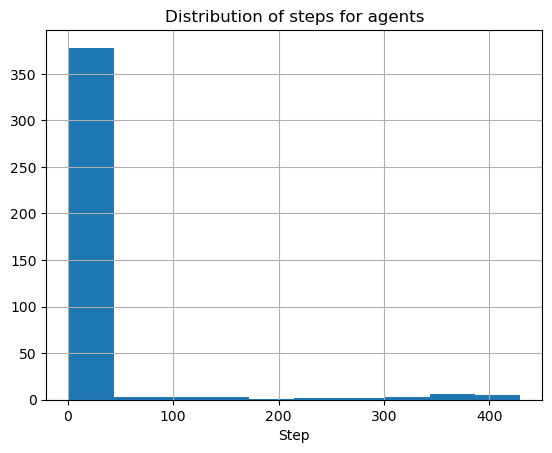

In [71]:
from schellingmob import SchellingAgent, SchellingModel
import math
import altair as alt
import matplotlib.pyplot as plt

def distance(p, q, type="euclid"):
    if type=="euclid":
        return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)
    
side = 50

dists=[]

for i in range(25):
    for k in range(25):
        dists.append(distance((0,0), (i,k)))
        
meandfc = sum(dists)/len(dists)

city = SchellingModel(side = side, density=.7,
                          mobility={"model":"gravity", "alpha":3, "beta":-3},
                          agents_report=True,
                          town=True)

city.datacollect()
while city.running and city.schedule.steps <= 500:
    city.step()

agent_df = city.datacollector.get_agent_vars_dataframe().reset_index()
agent_df["distc"]= agent_df.pos.apply(lambda p: distance(p, (side/2, side/2)))

unhappy_df = agent_df[agent_df["happy"]==False]

unhappy_df = unhappy_df.groupby("AgentID").agg({'Step': 'count', 'distc':'min', 'type':"mean"}).reset_index()
unhappy_df["type"] = unhappy_df["type"].apply(lambda x : "min" if x==1 else "maj")

unhappy_df["Step"].hist()
plt.xlabel("Step")
plt.title("Distribution of steps for agents")


Text(0.5, 0, 'Step')

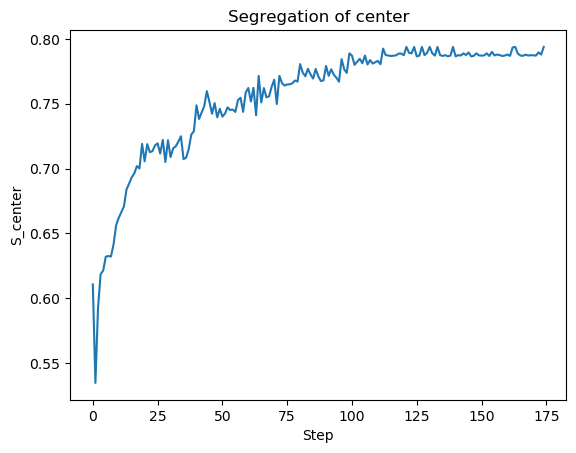

In [54]:

unhappy_df = unhappy_df[unhappy_df["Step"]>200]
outliers = list(unhappy_df["AgentID"])

model_df = city.datacollector.get_model_vars_dataframe()

plt.plot(model_df["center_segregation"])

plt.title("Segregation of center")
plt.ylabel("S_center")
plt.xlabel("Step")

10
0.20833333333333334
0.5
0.2631578947368421


/tmp/ipykernel_275145/4148645407.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"]
/tmp/ipykernel_275145/4148645407.py:72: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"].mean()
/tmp/ipykernel_275145/4148645407.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  candidates = set(agent_df[agent_df["Step"]==step_treshold][agent_df["type"]==1][agent_df["happy"]==False][agent_df["distc"]>meandfc*0.25][agent_df["distc"]<meandfc*0.75]["AgentID"])


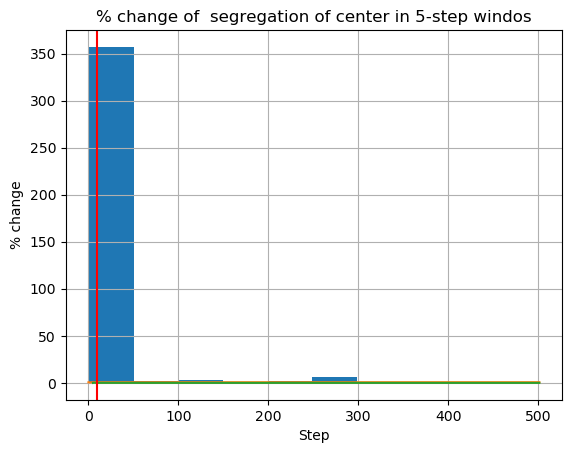

In [27]:



pct_change_censeg = model_df["center_segregation"].pct_change(periods=5)

step_treshold = pct_change_censeg.lt(0.02).idxmax()+5
print(step_treshold)

plt.plot(pct_change_censeg)

plt.axvline(x = step_treshold, color = 'r')

plt.title("% change of  segregation of center in 5-step windos")
plt.ylabel("% change")
plt.xlabel("Step")

agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"]

agent_df[agent_df["AgentID"].isin(outliers)][agent_df["Step"]==step_treshold]["distc"].mean()

candidates = set(agent_df[agent_df["Step"]==step_treshold][agent_df["type"]==1][agent_df["happy"]==False][agent_df["distc"]>meandfc*0.25][agent_df["distc"]<meandfc*0.75]["AgentID"])
outliers = set(outliers)

print(len(outliers.intersection(candidates))/len(outliers.union(candidates)))
print(len(outliers.intersection(candidates))/len(outliers))
print(len(outliers.intersection(candidates))/len(candidates))

Text(0, 0.5, 'Min distance from center')

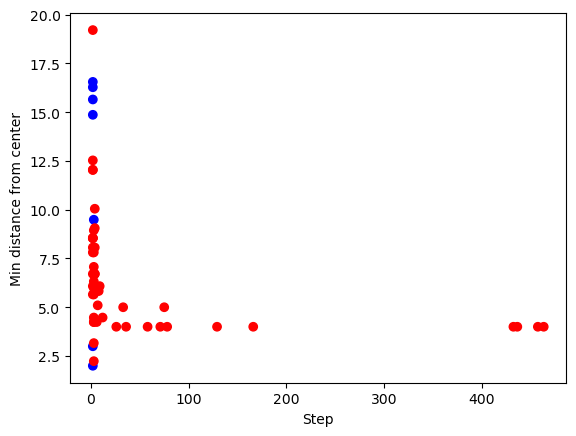

In [93]:
unhappy_df = unhappy_df[unhappy_df["Step"]>1]

plt.scatter(unhappy_df["Step"], unhappy_df["distc"].apply(lambda x: x), c=unhappy_df["type"].apply(lambda x: "red" if x=="min" else "blue"))

plt.xlabel("Step")
plt.ylabel("Min distance from center")

In [94]:
model_df = city.datacollector.get_model_vars_dataframe()

Text(0, 0.5, 'center segregation')

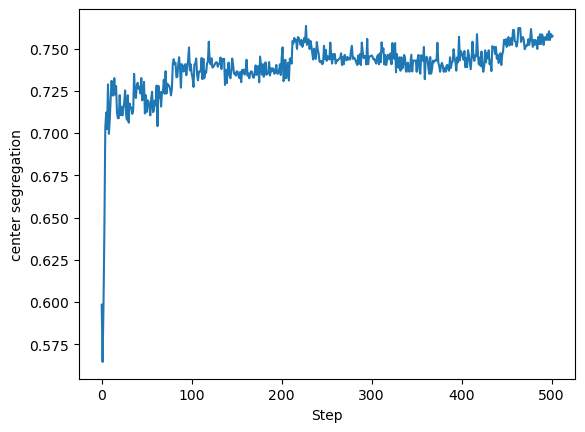

In [95]:
plt.plot(model_df["center_segregation"])

plt.xlabel("Step")
plt.ylabel("center segregation")

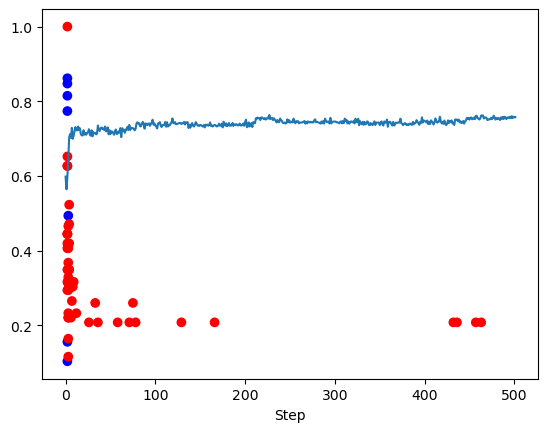

In [96]:
plt.plot(model_df["center_segregation"])

maxdist = max(unhappy_df["distc"])


plt.scatter(unhappy_df["Step"], unhappy_df["distc"].apply(lambda x: x/maxdist), c=unhappy_df["type"].apply(lambda x: "red" if x=="min" else "blue"))
plt.xlabel("Step")

plt.show()

In [97]:
agent_df = city.datacollector.get_agent_vars_dataframe().reset_index()
agent_df = agent_df[agent_df["happy"]==False]


In [98]:
unhappy_for_step  = list(agent_df.groupby("Step").AgentID.unique())

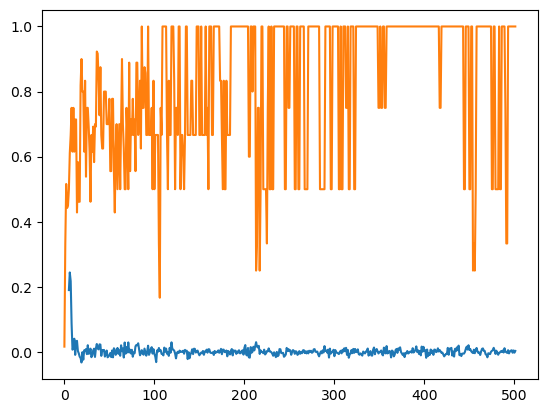

In [99]:
plt.plot(model_df["center_segregation"].pct_change(periods=5))


plt.plot([len(set(unhappy_for_step[i]).intersection(set(unhappy_for_step[i-1])))\
          /len(set(unhappy_for_step[i]).union(set(unhappy_for_step[i-1]))) for i in range(len(unhappy_for_step))])





In [12]:
agent_df = agent_df[agent_df["AgentID"].isin([80, 108, 231, 233, 432, 496])]


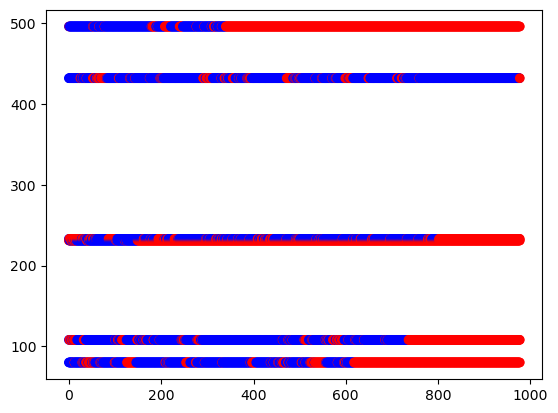

In [13]:
plt.scatter(agent_df["Step"], agent_df["AgentID"], c=agent_df["happy"].apply(lambda x: "red" if x==True else "blue"))


In [47]:
2

2

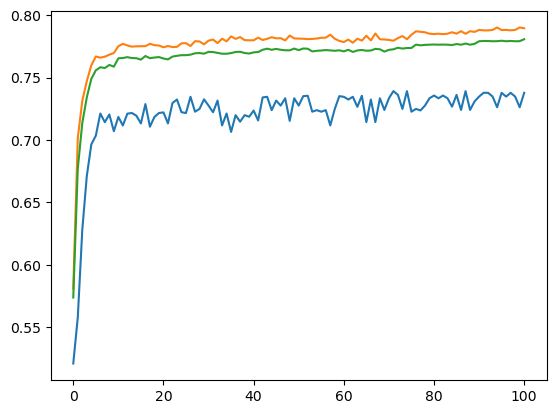

In [37]:
plt.plot(city.datacollector.get_model_vars_dataframe()["center_segregation"])
plt.plot(city.datacollector.get_model_vars_dataframe()["periphery_segregation"])

plt.plot(city.datacollector.get_model_vars_dataframe()["total_segregation"])


In [38]:
plt.scatter( df["Step"],df["distc"], c=df["type"].apply(lambda x: "red" if x=="min" else "blue"))

NameError: name 'df' is not defined

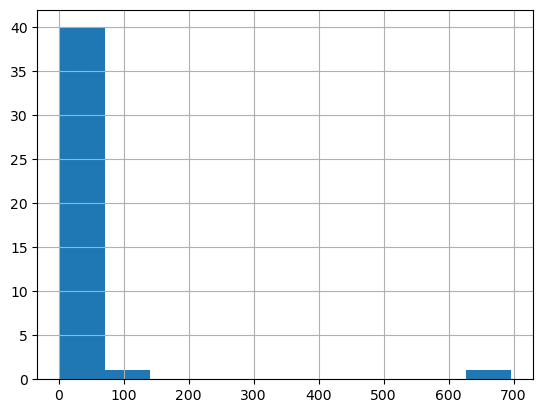

/tmp/ipykernel_2941297/2350285525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agent["dist"] = df_agent["pos"].apply(lambda p: distance(p,(15,15)))


KeyError: 'pos'

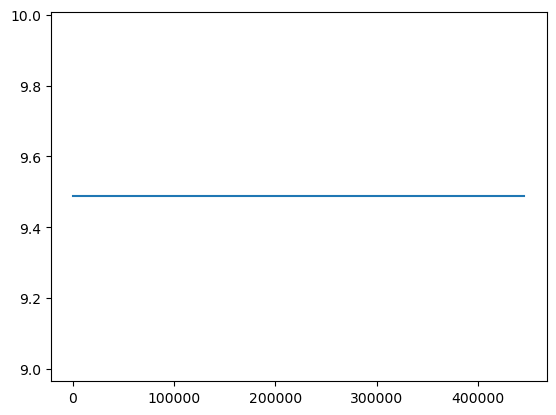

In [42]:
dfcoll = city.datacollector.get_agent_vars_dataframe().reset_index()
df_agent  = dfcoll[dfcoll["AgentID"]==521]
df_agent["dist"] = df_agent["pos"].apply(lambda p: distance(p,(15,15)))
plt.plot(df_agent["dist"])

df_agent  = df[df["AgentID"]==51]
df_agent["dist"] = df_agent["pos"].apply(lambda p: distance(p,(15,15)))
plt.plot(df_agent["dist"])

df_agent  = df[df["AgentID"]==547]
df_agent["dist"] = df_agent["pos"].apply(lambda p: distance(p,(15,15)))
plt.plot(df_agent["dist"])

In [45]:
list(df_agent["pos"])[0]

(29, 27)

In [46]:
list(df_agent[df_agent["dist"]==1]["pos"])[0]

IndexError: list index out of range

In [47]:
list(df_agent["pos"])[-1]

(29, 27)

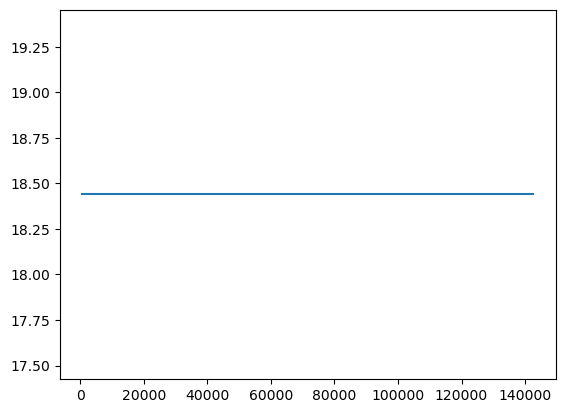

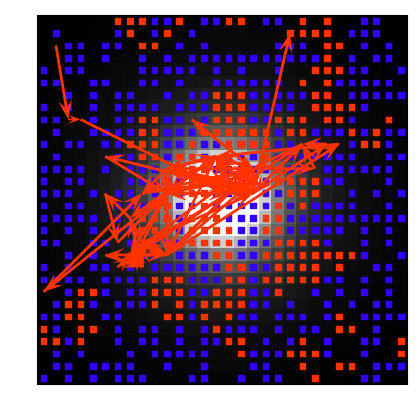

<Figure size 1000x1000 with 0 Axes>

In [40]:
city.show(traces=[23])

In [168]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAigAAAGgCAYAAACABpytAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nO3df3wU1aH38e9mNwk/TCI/syxEjIpQSKSKFggoKBDEInptBQURLfpgUTQVL4jeXtFrE8QWbEWx+iBQreLTShCviKBCFFMUEBRQkZYoQYgoxk2AkITkPH9Ms7D5sckmm80k+bxfr3lBZs7MOTOZZL6ZPXPGYYwxAgAAsJGIpm4AAABAZQQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgO0EHlG+++UY33XSTOnXqpHbt2umnP/2ptm3b5ltujNHcuXPl8XjUtm1bDR8+XLt37/bbRnFxsWbMmKHOnTurffv2GjdunA4cONDwvQEAAC2CK5jC+fn5GjJkiC6//HK9+eab6tq1q/71r3/pzDPP9JWZP3++FixYoGXLlun888/Xo48+qlGjRmnPnj2KiYmRJKWlpen111/XihUr1KlTJ82cOVNjx47Vtm3b5HQ6a21HeXm5Dh48qJiYGDkcjiB3GQAANAVjjAoLC+XxeBQRUcs9EhOE2bNnm6FDh9a4vLy83LjdbjNv3jzfvBMnTpi4uDjzzDPPGGOM+fHHH01kZKRZsWKFr8w333xjIiIizNq1a+vUjtzcXCOJiYmJiYmJqRlOubm5tV7rg7qDsnr1ao0ePVrXX3+9srKy1L17d02fPl233367JCknJ0d5eXlKTU31rRMdHa1hw4YpOztb06ZN07Zt21RaWupXxuPxKCkpSdnZ2Ro9enSVeouLi1VcXOz72vz7Bcy5ubmKjY0NZhcAAEATKSgoUEJCgu8TlUCCCij79u3T4sWLde+99+qBBx7QRx99pLvvvlvR0dG6+eablZeXJ0mKj4/3Wy8+Pl5ff/21JCkvL09RUVHq0KFDlTIV61eWkZGhhx9+uMr82NhYAgoAAM1MXbpnBNVJtry8XBdddJHS09N14YUXatq0abr99tu1ePHigBUbY2ptTKAyc+bMkdfr9U25ubnBNBsAADQzQQWUbt26qW/fvn7zfvKTn2j//v2SJLfbLUlV7oQcPnzYd1fF7XarpKRE+fn5NZapLDo62ne3hLsmAAC0fEEFlCFDhmjPnj1+87788kv17NlTkpSYmCi3263169f7lpeUlCgrK0spKSmSpAEDBigyMtKvzKFDh7Rr1y5fGQAA0LoF1QflN7/5jVJSUpSenq7x48fro48+0rPPPqtnn31WkvXRTlpamtLT09WrVy/16tVL6enpateunSZOnChJiouL09SpUzVz5kx16tRJHTt21H333afk5GSNHDky9HsIAACanaACyiWXXKLMzEzNmTNHjzzyiBITE/XEE09o0qRJvjKzZs1SUVGRpk+frvz8fA0cOFDr1q3z67G7cOFCuVwujR8/XkVFRRoxYoSWLVtWpzFQAABAy+cwFc/sNiMFBQWKi4uT1+ulPwoAAM1EMNdv3sUDAABsh4ACAABsJ6g+KAiRggLp7belY8ekpCTpwgubukUAANgKASWcysqk//5vacEC6cSJU/MvukhatkxKTm6ypgEAYCd8xBNOd90lZWT4hxNJ+uQTaehQ6Z//bJp2AQBgMwSUcNmzR3rmGam6h6bKyqTjx6VHHw1/uwAAsCECSri8+KIUaJyXkyell16qencFAIBWiIASLnl5Um1vbywtlbze8LQHAAAbI6CEi8dT/cc7p4uOls48MzztAQDAxggo4XLzzVZfk5q4XNKkSVZIAQCglSOghMu550ppadUvczqlmBjpv/4rvG0CAMCmCCjh9Ic/SP/zP1Ll9w+kpEj/+IeUmNg07QIAwGZ4WWBTKCqSNm60Hi3u10/q06epWwQAQKML5vrNSLJNoW1bacyYpm4FAAC2xUc8AADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdoIKKHPnzpXD4fCb3G63b7kxRnPnzpXH41Hbtm01fPhw7d69228bxcXFmjFjhjp37qz27dtr3LhxOnDgQGj2BgAAtAhB30Hp16+fDh065Jt27tzpWzZ//nwtWLBAixYt0pYtW+R2uzVq1CgVFhb6yqSlpSkzM1MrVqzQpk2bdPToUY0dO1ZlZWWh2SMAANDsuYJeweXyu2tSwRijJ554Qg8++KCuu+46SdLy5csVHx+vl156SdOmTZPX69WSJUv0wgsvaOTIkZKkF198UQkJCXr77bc1evToaussLi5WcXGx7+uCgoJgmw0AAJqRoO+g7N27Vx6PR4mJibrhhhu0b98+SVJOTo7y8vKUmprqKxsdHa1hw4YpOztbkrRt2zaVlpb6lfF4PEpKSvKVqU5GRobi4uJ8U0JCQrDNBgAAzUhQAWXgwIH6y1/+orfeekvPPfec8vLylJKSoiNHjigvL0+SFB8f77dOfHy8b1leXp6ioqLUoUOHGstUZ86cOfJ6vb4pNzc3mGYDAIBmJqiPeMaMGeP7f3JysgYPHqxzzz1Xy5cv16BBgyRJDofDbx1jTJV5ldVWJjo6WtHR0cE0FQAANGMNesy4ffv2Sk5O1t69e339UirfCTl8+LDvrorb7VZJSYny8/NrLAMAANCggFJcXKzPP/9c3bp1U2Jiotxut9avX+9bXlJSoqysLKWkpEiSBgwYoMjISL8yhw4d0q5du3xlWg1jpPLypm4FAAC2FFRAue+++5SVlaWcnBx9+OGH+uUvf6mCggJNmTJFDodDaWlpSk9PV2Zmpnbt2qVbbrlF7dq108SJEyVJcXFxmjp1qmbOnKl33nlH27dv10033aTk5GTfUz0t3vbt0sSJUrt2ktMp9e4tPfmkVFLS1C0DAMA2guqDcuDAAd144436/vvv1aVLFw0aNEibN29Wz549JUmzZs1SUVGRpk+frvz8fA0cOFDr1q1TTEyMbxsLFy6Uy+XS+PHjVVRUpBEjRmjZsmVyOp2h3TM7euMN6dprrf+fPGn9u3evdM890urV1vKoqKZrHwAANuEwxpimbkSwCgoKFBcXJ6/Xq9jY2KZuTt0UFkrduknHj1sf71QWESH97nfS/feHv20AAIRBMNdv3sUTLn/9a83hRLL6ozz5JP1SAAAQASV8tm+3+pwEcvCgdORIeNoDAICNEVDCpa59SxjvBQAAAkrYjB17qmNsdSIipJQUqbn0qQEAoBERUMJl1CgpKUly1fDgVHm5NGdOeNsEAIBNEVDCJSJCevNN6dxzra8r+qM4ndayP/7RussCAACCGwcFDdSjh7RzpzXmycqV1lM9/fpJt90mnX12U7cOAADbIKCEW2Sk9ItfWBMAAKgWH/EAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbIaAAAADbaVBAycjIkMPhUFpamm+eMUZz586Vx+NR27ZtNXz4cO3evdtvveLiYs2YMUOdO3dW+/btNW7cOB04cKAhTQEAAC1IvQPKli1b9Oyzz+qCCy7wmz9//nwtWLBAixYt0pYtW+R2uzVq1CgVFhb6yqSlpSkzM1MrVqzQpk2bdPToUY0dO1ZlZWX13xMAANBi1CugHD16VJMmTdJzzz2nDh06+OYbY/TEE0/owQcf1HXXXaekpCQtX75cx48f10svvSRJ8nq9WrJkif7whz9o5MiRuvDCC/Xiiy9q586devvtt0OzVwAAoFmrV0C588479fOf/1wjR470m5+Tk6O8vDylpqb65kVHR2vYsGHKzs6WJG3btk2lpaV+ZTwej5KSknxlKisuLlZBQYHfBAAAWi5XsCusWLFCH3/8sbZs2VJlWV5eniQpPj7eb358fLy+/vprX5moqCi/Oy8VZSrWrywjI0MPP/xwsE0FAADNVFB3UHJzc3XPPffoxRdfVJs2bWos53A4/L42xlSZV1mgMnPmzJHX6/VNubm5wTQbAAA0M0EFlG3btunw4cMaMGCAXC6XXC6XsrKy9Kc//Ukul8t356TynZDDhw/7lrndbpWUlCg/P7/GMpVFR0crNjbWbwIAAC1XUAFlxIgR2rlzp3bs2OGbLr74Yk2aNEk7duzQOeecI7fbrfXr1/vWKSkpUVZWllJSUiRJAwYMUGRkpF+ZQ4cOadeuXb4yAACgdQuqD0pMTIySkpL85rVv316dOnXyzU9LS1N6erp69eqlXr16KT09Xe3atdPEiRMlSXFxcZo6dapmzpypTp06qWPHjrrvvvuUnJxcpdMtAABonYLuJFubWbNmqaioSNOnT1d+fr4GDhyodevWKSYmxldm4cKFcrlcGj9+vIqKijRixAgtW7ZMTqcz1M0BAADNkMMYY5q6EcEqKChQXFycvF4v/VEAAGgmgrl+8y4eAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgOwQUAABgO66mbkCrU14uvf22lJkpHTsm9esn3Xqr1LVrU7cMAADbIKCE0+HD0pgx0scfSy6XZIw1/fa30p//bAUVAADARzxhY4z0859Ln35qfX3ypFRWZt1RKS2Vpk6V1q9v2jYCAGATBJRw2bBB2rrVCibViYiQfve78LYJAACbIqCEy2uvWR/r1KSsTMrKkgoLw9cmAABsioASLkVFdSt34kTjtgMAgGaAgBIuF1xg3SUJpEsXqWPH8LQHAAAbI6CEy003SW3aSA5H9csjIqS77pKczvC2CwAAGyKghMuZZ0rLl1sBpXIIiYiQBg6U/vM/m6ZtAADYDAElnK6/XnrvPenKK61QIkndukmPPCK9847Utm3Ttg8AAJtgoLZwGzJE+t//lUpKpOJi6Ywzav7YBwCAVoqA0lSioqwJAABUwUc8AADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdggoAADAdoIKKIsXL9YFF1yg2NhYxcbGavDgwXrzzTd9y40xmjt3rjwej9q2bavhw4dr9+7dftsoLi7WjBkz1LlzZ7Vv317jxo3TgQMHQrM3AACgRQgqoPTo0UPz5s3T1q1btXXrVl1xxRW65pprfCFk/vz5WrBggRYtWqQtW7bI7XZr1KhRKiws9G0jLS1NmZmZWrFihTZt2qSjR49q7NixKisrC+2eAQCAZsthjDEN2UDHjh31+OOP61e/+pU8Ho/S0tI0e/ZsSdbdkvj4eD322GOaNm2avF6vunTpohdeeEETJkyQJB08eFAJCQlas2aNRo8eXac6CwoKFBcXJ6/Xq9jY2IY0HwAAhEkw1+9690EpKyvTihUrdOzYMQ0ePFg5OTnKy8tTamqqr0x0dLSGDRum7OxsSdK2bdtUWlrqV8bj8SgpKclXpjrFxcUqKCjwmwAAQMsVdEDZuXOnzjjjDEVHR+uOO+5QZmam+vbtq7y8PElSfHy8X/n4+Hjfsry8PEVFRalDhw41lqlORkaG4uLifFNCQkKwzQYAAM1I0AGld+/e2rFjhzZv3qxf//rXmjJlij777DPfcofD4VfeGFNlXmW1lZkzZ468Xq9vys3NDbbZAACgGQk6oERFRem8887TxRdfrIyMDPXv319//OMf5Xa7JanKnZDDhw/77qq43W6VlJQoPz+/xjLViY6O9j05VDEBAICWq8HjoBhjVFxcrMTERLndbq1fv963rKSkRFlZWUpJSZEkDRgwQJGRkX5lDh06pF27dvnKAAAAuIIp/MADD2jMmDFKSEhQYWGhVqxYoY0bN2rt2rVyOBxKS0tTenq6evXqpV69eik9PV3t2rXTxIkTJUlxcXGaOnWqZs6cqU6dOqljx4667777lJycrJEjRzbKDgIAgOYnqIDy7bffavLkyTp06JDi4uJ0wQUXaO3atRo1apQkadasWSoqKtL06dOVn5+vgQMHat26dYqJifFtY+HChXK5XBo/fryKioo0YsQILVu2TE6nM7R7BgAAmq0Gj4PSFBgHBQCA5ics46AAAAA0FgIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHQIKAACwHVdTN6DVOXFC+vvfpcxM6ehRKSlJmjZNOv/8pm4ZAAC2QUAJp6++kkaMkPbtkyIipPJy6d13pYULpXnzpFmzmrqFAADYAh/xhEtZmTRmjLR/v/V1ebn178mTkjHS7NnWXRUAAEBACZu1a6UvvrACSXUiIqy7KAAAgIASNmvXSq4An6iVl0sffSR5veFrEwAANkVACZeSktCWAwCgBSOghMsll9T88U6FHj2kTp3C0x4AAGyMgBIuN94oxcZafU2q43BI99xT83IAAFoRrobh0r69Nf6Jy+XfF6UikFx1lRVQAAAAASWsRo2SPv5Yuvlm625KVJQ1UNuzz0qrVkmRkU3dQgAAbMFhjDFN3YhgFRQUKC4uTl6vV7GxsU3dHAAAUAfBXL+5gwIAAGyHgAIAAGyHgAIAAGyHgAIAAGyHgAIAAGyHgAIAAGwnqICSkZGhSy65RDExMeratauuvfZa7dmzx6+MMUZz586Vx+NR27ZtNXz4cO3evduvTHFxsWbMmKHOnTurffv2GjdunA4cONDwvQEAAC1CUAElKytLd955pzZv3qz169fr5MmTSk1N1bFjx3xl5s+frwULFmjRokXasmWL3G63Ro0apcLCQl+ZtLQ0ZWZmasWKFdq0aZOOHj2qsWPHqqysLHR7BgAAmq0GDdT23XffqWvXrsrKytJll10mY4w8Ho/S0tI0e/ZsSdbdkvj4eD322GOaNm2avF6vunTpohdeeEETJkyQJB08eFAJCQlas2aNRo8eXaWe4uJiFRcX+74uKChQQkICA7UBANCMhG2gNq/XK0nq2LGjJCknJ0d5eXlKTU31lYmOjtawYcOUnZ0tSdq2bZtKS0v9yng8HiUlJfnKVJaRkaG4uDjflJCQ0JBmAwAAm6t3QDHG6N5779XQoUOVlJQkScrLy5MkxcfH+5WNj4/3LcvLy1NUVJQ6dOhQY5nK5syZI6/X65tyc3Pr22wAANAMuGovUr277rpLn376qTZt2lRlmcPh8PvaGFNlXmWBykRHRys6Orq+TQUAAM1Mve6gzJgxQ6tXr9aGDRvUo0cP33y32y1JVe6EHD582HdXxe12q6SkRPn5+TWWAQAArVtQAcUYo7vuuksrV67Uu+++q8TERL/liYmJcrvdWr9+vW9eSUmJsrKylJKSIkkaMGCAIiMj/cocOnRIu3bt8pUBAACtW1Af8dx555166aWX9NprrykmJsZ3pyQuLk5t27aVw+FQWlqa0tPT1atXL/Xq1Uvp6elq166dJk6c6Cs7depUzZw5U506dVLHjh113333KTk5WSNHjgz9HgIAgGYnqICyePFiSdLw4cP95i9dulS33HKLJGnWrFkqKirS9OnTlZ+fr4EDB2rdunWKiYnxlV+4cKFcLpfGjx+voqIijRgxQsuWLZPT6WzY3gAAgBahQeOgNJVgnqMGAAD2ELZxUAAAABoDAQUAANgOAQUAANhOvQdqa3FOnJD+9jfp3Xel8nIpJUWaNEk644ymbhkAAK0OnWQl6ZNPpCuvlPLyJJdLMsYKKbGx0muvScOGNbwOAABaOTrJBuOHH6QRI6TvvrO+PnlSKiuzQkphoTRmjJST07RtBACglSGgLF0q5edboaSy8nKppER66qnwtwsAgFaMgLJypRVEalJWJv397+FrDwAAIKDo2LHayxQVNX47AACADwFlwACrY2xNnE7ppz8NX3sAAAABRdOnWx1ja1JWJt11V/jaAwAACCgaMECaO9f6f8Rph6Pi///n/0hjx4a9WQAAtGYEFEl66CHp1VelSy45Na9vX+n556VnnpEcjqZrGwAArRAjyVa47jprKi62PtZp166pWwQAQKtFQKksOrqpWwAAQKvHRzwAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2CCgAAMB2gg4o7733nq6++mp5PB45HA6tWrXKb7kxRnPnzpXH41Hbtm01fPhw7d69269McXGxZsyYoc6dO6t9+/YaN26cDhw40LA9AQAALUbQAeXYsWPq37+/Fi1aVO3y+fPna8GCBVq0aJG2bNkit9utUaNGqbCw0FcmLS1NmZmZWrFihTZt2qSjR49q7NixKisrq/+eAACAFsNhjDH1XtnhUGZmpq699lpJ1t0Tj8ejtLQ0zZ49W5J1tyQ+Pl6PPfaYpk2bJq/Xqy5duuiFF17QhAkTJEkHDx5UQkKC1qxZo9GjR9dab0FBgeLi4uT1ehUbG1vf5gMAgDAK5vod0j4oOTk5ysvLU2pqqm9edHS0hg0bpuzsbEnStm3bVFpa6lfG4/EoKSnJV6ay4uJiFRQU+E0AAKDlCmlAycvLkyTFx8f7zY+Pj/cty8vLU1RUlDp06FBjmcoyMjIUFxfnmxISEkLZbAAAYDON8hSPw+Hw+9oYU2VeZYHKzJkzR16v1zfl5uaGrK0+GzdKY8dKbdtKbdpIl18urV4d+noAAECtQhpQ3G63JFW5E3L48GHfXRW3262SkhLl5+fXWKay6OhoxcbG+k0h9ac/WYHkrbekEyek4mLp/fela66RHnggtHX9+KO0cKE0dKjUv790883SP/4R2joAAGjmQhpQEhMT5Xa7tX79et+8kpISZWVlKSUlRZI0YMAARUZG+pU5dOiQdu3a5SsTVrt2SWlp1v9Pnjw1v+KJoowM6e23Q1PXZ59JvXtLM2dKH3wgffqp9PLLUkqKNGuWVP/+ygAAtCiuYFc4evSo/vnPf/q+zsnJ0Y4dO9SxY0edddZZSktLU3p6unr16qVevXopPT1d7dq108SJEyVJcXFxmjp1qmbOnKlOnTqpY8eOuu+++5ScnKyRI0eGbs/qavFiyen0Dyenc7mkJ5+UGtq20lJpzBjpyBH/IFJR7+OPS8nJ0uTJDasHAIAWIOiAsnXrVl1++eW+r++9915J0pQpU7Rs2TLNmjVLRUVFmj59uvLz8zVw4ECtW7dOMTExvnUWLlwol8ul8ePHq6ioSCNGjNCyZcvkdDpDsEtBys6uOZxI1rLNmxtez+rV0v79NS+PiJDmz5duukmqpb8OAAAtXYPGQWkqIR0HZdAg6cMPA5fp0UNqaMfcO++UnnvOupMSyA8/SJWecAIAoCVosnFQmqWrr7buXtTE5ZLGjWt4PeXldetjUl7e8LoAAGjmCCi33Sa1a1d9SHE4rGnGjIbXk5IS+KMkh0M67zypY8eG1wUAQDNHQImPl9aulWJiTgUSyQos0dHSq69Kffo0vJ7rr5c6d7Y65FbHGOnee+l/AgCA6tFJtkUaMkT66itp2TLpnXesj1mGDJGmTrUCTCi0aSO9/rqUmiodP37qMWan0/r/zTdL06aFpi4AAJo5OsmGW26u9PTT0iuvWEElOdnqQHvNNdw9AQC0aMFcvwkoAAAgLIK5fvMRT7iVlUlr1kirVknHjkn9+km/+pXUvXtTtwwAANvgDko4HTokjR4t7dxpPb5cXn7qY52nnqIPCgCgRWMcFDsqL5euukr6/HPr65MnrXllZdZ0xx3Sm282bRsBALAJAkq4vPuutGNHzWOhOJ3WiwkBAAABJWxef936WKcmZWXS++9LBQXhaxMAADZFQAmXEyfqVq64uHHbAQBAM0BACZf+/U8NzlYTt1vq1Ck87QEAwMYIKOEyaZLUtm3Ng7FFREh33RX4xYWh8vXX0sMPS7fcYg2vv3Vr49cJAEAQCCjhEhcn/fWvVgCp3BclIkIaOlSaObNx22CM9MgjUmKi9D//Y7XnySelSy6Rrr1WKipq3PoBAKgjAko4XXutlJ1tDWtf8dLAnj2lxx6T3nrLel9PY3ruOemhh6ygUlZmPVFU8VTR668zDgsAwDYYqK2plJVJpaWNH0pOr+/ss6UDB2ou43BYL00866zwtAkA0KowUFtz4HSGL5xI0qefBg4nFV5/vXKFEEcAABxKSURBVPHbAgBALQgorcXx47WXiYigHwoAwBYIKK3F+ecHHihOsj4GSkoKT3sAAAiAgNJadOkiXX99zSElIsLqezJqVHjbBQBANQgorcmCBVL37qeeIKrgcknR0dLLL1ddBgBAEyCgtCZut7Rli3T33VJF72mXy7qz8tFHUkpK07YPAIB/4zHj1qqsTPJ6pTPOkKKimro1AIBWIJjrdy29JtEo9u2TVq+Wjh2T+vWTxo6tvQNrqDmdUseO4a0TAIA6IqCEU1GRdNttVl8Ph8PqmHrypPXRy1//Kl1xRVO3EAAAW6APSjhNmiStWGENNV9efmqY+cOHpTFjpO3bw9eWo0elf/5TOnIkfHUCAFBHBJQK5eXS+vXSnDnS7NnSa6+dChChsG2blJlp1VNd3WVl0qOPhq6+muTmSrfeKnXqJPXqJXXuLKWmSps3N37dAADUEZ1kJatPyNVXS599ZvUFcTis9+QkJFhDv/fv3/A6Zs2yHvMtK6u5TESEVFgotWvX8Pqq89VX0sCB0g8/+Icvp9Pa5zfesMIKAACNgHfxBOPoUWn4cOnLL62vT560wokkHTwoXX659W9D/fBD4HAiWXdSjh5teF01+c1vqoYTyWpXWZl0882hvWsEAEA9EVBeeMF6iV51F+ayMqmgQFq8uOH1REbWXiYiQurQoeF1VScvz3pyqKYAYoz07bfSmjWNUz8AAEEgoKxYEXh5WZn00ksNr+eHH2ovU14ulZQ0vK7q/Otf1fd/OZ3TKe3Z0zj1AwAQBAKK12vdPQiksLDh9VR8hFSbxnqqJiam9jLl5XUrBwBAIyOg9OsXeJC0iAjpJz9peD11Ha21sd6Fk5QknXNO4DIREdI11zRO/QAABIGAMm1a4I6h5eXSr3/d8Houu6z2Mk6n9dhvY4iIkB5+OHCZW2+VunVrnPoBAAgCAeXSS08FEIfDf5nDIV17rfUyvYa6447ay0yaZL1VuLF8913g5d9/33h1AwAQBAKKwyE99ZQ19ex5ar7bLaWnS3/7W2g+djn3XOm++2puQ4cO0iOPNLyempSWSvPmBS6zapXVmRYAgCZGQJGsgDB9unVx/uora+C23Fzp/vtD+xK/+fOljAwpLs5//rBh0ocf+gekUPvkE2tI/UAcDh4zBgDYAi8LPF1EROOGBIfDCj1padL770vHj0t9+1pDzje2ujy+7HBIxcWN3xYAAGpBQGkKbdpIo0aFt86f/MT6qCrQaLbl5dJFF4WvTQAA1ICPeFqLuDgrGNXm/PMbvy0AANSCgNJafPqpdOxY4DIOh/VyRAAAmhgBpbWoLZxUCPZlhSUl0vLl0uDBUteuUp8+0tSp0lVXWU9CnXWWNGMGQ+gDAIJCH5TWIjGx9jLGSJ061X2bRUXSmDFSVtaped99VzWMPPOM9Oc/SytXSmPH1n37LVFxsfV27HbtpPj4pm4NANgWAaW1yMurW7lg7qA8+KB/OKnJyZPWx0fXXy99/bV1p6W18XqtkXz/7/899W6nSy6R/vu/mzy0HT0qvfKK9MUX0hlnSL/4hfVmhFodOSK9/LL1aH6nTtINN/iC8Nat1suzi4qkCy6QfvlLqW3bRt0N+8rNtY7T4cNSjx7SxImt82cACJZphrxer5FkvF5vUzel+di0yRjrHkng6fHH67a9o0eNiYys2zYrpogIY9LTq2yqpMSYN980ZulSY956y5jS0hDt844dxtx8szGxsca0aWPMoEHGvPiiMWVlgdd77DFjunTxb7fTaYzbbczs2cZ8841VLjvbmJEjrePgdBpzwQXGrFplTHm5tfyHH4x55RVjFi825rzzrDKVj4dkzJ//HKIdDqCoyJjXXjPm97835vrrjZk61Zi77zZZ3W80z+lWs0i/NgO0xTid5UYy5j/+w/oW+/bjkUeMOessY6KjjenRw5hRo061/7Tph1/ebq64vMxIxrhcp06RDh2MWbs2RPtSXGzMLbcY07btqbr79DHm9detk2ftWutkevNN6+QyxphvvzXm5ZeNWb7cmN27a6/j6FFjVq40Ji3NmORkY6KirH1PTTUmK6tu7SwrM2bmTGMcDutYRUaeOpd+8QtjZsww5tFHjXn/feucOXz4VBt37ar34SkrM2bDBusQrF5tfeur3belS63fCyUlxjz7rDHnn2+1sX17Y2691Zgvvqh3G8Li88+N+ctfjHnpJWMOHQpPnV98carOgwfDU2eYlZcb89571umxapUxx4+HdvvBXL8JKK3F/v11CxGPPFK37X3wQXDhpGIaM8ZvMy++aEzXrv5FunUz5v/9vwbu76pV1hXS5aoaCG66qeaQMmZM4PY7ncZ07mzMnDk1l7nxRuvCFh1dt2MSGWldnBpDebkxf/yjMTExtbajXDJ7dY7prG+N02nMtdcaK4wlJlYbRqpbf4jeN07HyWqzaWSkMdu2NXB/ioqMiY+vuR1nnOH/dZcuxgwf7n8eSMZcdpkxX31V/fFKT6+6nfoE+f/+77r/XMTEVA2wQ4cas29fUIdn7Vpjevb038yZZxrz1FP/3rd586ruW5s2NZ/r77wTVP1hsX+/MZdf7t9Wl8sKVceONU6dubnGXHFF1eNzyy2nJfnmb8MGY8491383Y2ON+cMfTv3d1VAEFFT1xBN1+0V50UV1296iRfULKMnJvk28+GLgoq++Ws99/f5765euw1Hzxpcsqbre88/XbR8qX0gaOkVE1P3OVbB+//ug2lIumR90pnGp2EjGeIdeVfXiXsP0ji4PWMTlsm7eNMi4caE55i6XMR6PdWfldP/1X3XfxvbtNbfT6635wh9MG93uOt8deOcd69Ss6bTffOVDwbchKir0f0I3xPffG5OQUP056XRadzRru0MarCNHrLuH1dUZEWEFl5MnQ1tnE8jOPnWTr7pT4Xe/C009zSagPPXUU+bss8820dHR5qKLLjLvvfdendYjoNTDlCl1+4UUH1+37T31VP1+6brdxhjrrnLlOyenTw6H9TuhXr9rHn888F/8ERF+QcnnnHNCc/Grz4Vo6tR67Ggtfvyx3hfJufqtOc+5z5QrQMirNN2hp41LJQGLOZ0N+AivrCy04dDpNObBB09t/9Ch4LY/alTNbX3lldC18f7763R4fvrTmk/7LvrWlKhuQbPKNH9+Pb9hjeDhh2v/Hr35ZmjrfOSR2u8gvvFGaOtsApdeGvjQRkVZWa2hgrl+N9ljxq+88orS0tL04IMPavv27br00ks1ZswY7d+/v6ma1LIlJ9etXF2fLOnSpX7t+PeQ++++G/jVQMZI+/dL2dn1qGPLlsDLy8ulnTutzruna8pzLyYm9NvMzKzXqwuMpF/peQ3QNjlk6rxeoWJk5AhYpqxMOnEi6CZZ/vWvwCMhB6usTHr++VNfr1hhnXh1tXlzzcsqOkI3VFmZtGRJrcU+/1zascM6taszQa8oQjUsrM3f/la/9RrDkiWBzwGnU/rLX0JfZ00HtqLO5ctDW2eY7d9vvX0l0KEtLZX+/vfwtUlqwnFQFixYoKlTp+q2227TT37yEz3xxBNKSEjQ4sWLm6pJLduNN9at3D331K2cx1O/dpx5piTp22/rVryuDx/5cbmsp4YCiYiwpsrzmsLJk9ZjLqH27bf1ehO3Q1KcvCouC+4hv/P1Za1lunaV2rcPukmW6Oh6rhjAd9+d+n+wx6tywD1dKEdkPnKk1uBU289TvL5Vmer5VvZ6J8pGUNsLT8vKpG++CW2dp58jNdV58GBo6wyz2g6rZP1o1Ov3cQM0yW/kkpISbdu2TampqX7zU1NTlV3Nn8zFxcUqKCjwmxAkj6f2uyiRkdLNN9dte927168dkyYFtXq9qrnyytr/yho1qmog+elP61FZAzmd0vDhUkpK6LfdvXvgi2gNjKR8ddCHbYbJRNU9FPxKzwe8gxIRYb00vLbsWKOzzrLGjwklt/vU/7t3D+4OTUJCzcuGDrVeAhqK0BsfX+tBq+3n5Bt1l0vBnwuSpAsvrN96jaG2P4xcLus8CWedTmfgc6EZ6Nat9jJlZfX/tV9vDf9EKXjffPONkWQ++OADv/m/+93vzPnnn1+l/EMPPWRk/d70m+iDEqR9+4xp167mDxn/93+D296llwbuiFp5atvWmIICY4zVp6x795pXdzis3uT16jleVGRtPNAHqm+/XXW999+v234Es8/VTRERpzrcjRxpTH5+PXayDgoLrUdG69HG+/U7s3y5MebOO+v0BE/FtFD3+Hbx9EVOp9VHorCwgfv0n//ZsGNf+fvw8MOntv3dd8E9Ol9dR+vTffCB1QeoIf1mnE7raaA6GDiw5m9VBx0xJxRVvzYE+SRRo8rIqP18DPWTR/Pm1V7n+vWhrbMJjBwZ+FRt08bq1tZQtu8kWxFQsrOz/eY/+uijpnfv3lXKnzhxwni9Xt+Um5tb5x1EJV9/bT1KcfoPXEqK9cs0WB99ZD1KW5cLWPv2xnz8sd/qK1da1/rK1/uKYSPWrGnAfu7ebXXIPb0Cp9Pa8FNP1bxeenrN+1CxnUGDjImLC7y/1YWYiAjrmb3bb7c6Z27d2oAdrKPFi4O6GJVL5oizs3nz9X/3ZD1xwpirr7aWV4SqQE/19Otn/rbsqLngglOzYmKs4UD+nU0bbvTo+l/wKyaXy3p8+ocf/LedkVG39S+8sG5Pbnz8sTE//3n9Qq3LZT0z/P33dTostT2FsfmX84Nvwx13BP/9aUw//mhMr141P1Ezblzonoet4PVaY8TUVOfVV4e+zibw8cfW35A1nT9PPBGaemwfUIqLi43T6TQrV670m3/33Xebyy67rNb1eYonBAoKjNmzp+Hjb2RnG7+rkWSNPXHVVcYMHmyNV7BokfVDXo1Vq4w5+2z/1c87r4HhpEJhoTUA1dixxowYYf31vXdv7evt2mVdBDt2tAJF9+7G/OxnxkyYYI18dfKktT99+1b9KY6PN+azz4yZO7fq2CMjRjTNX6NLlwZ+ZOq0cFJyfr+q36vycuuv0smTre/nTTcZs26dNcjX5MnWn+7jxlkDwf37ol1ebg0dsXdvNQOFhcLrr1shoUMH65jfdps1yFnlQRzOPtsa0OX0p5kcDuuiUt3ju+Xl1vnaqVP1x8nptJ6IC3a8je+/t86rO++s/kLXubP/uDkOhxVsKgYFrKP33zemXz//TXs81thixhhjnn7aqqtSqDR9+vjPa9fOGkTOjhfeb7+1vqenh742bayxh4qLG6fOw4et0Qsr13n33VaIbyE+/NC603n6qdC1qzHPPRe6OoK5fjuMMSbMnypJkgYOHKgBAwbo6aef9s3r27evrrnmGmVkZARct6CgQHFxcfJ6vYqNjW3spqI2xliPEOTkSB07Wp+/u+rewbK83HogIi/P+ozzZz9rQD+FcPv6a2npUuvppP/4D2v4+grHj1td44uKrLHjzzuv6dp58qS0aZPV3q1brZ6qw4ZJnTtbT/tERUm33ir17Nl0bQwFY6QPP7Q6LXbrJg0caPUDKSiw9r+kRLrootr7KZSUWN+7ggKrY3dhobWdwYODe19VdQoKpI0brZ8Zt1saNMh6H0BhoVVnSYnV76Oe3wtjpO3brTcQdO4sDRlSqe9vaalVj9drnZMVfdO++MJ6HOiMM6RLL5XatGnYfja23Fzp44+t3zVDh0pxcY1f54ED0rZtVp1Dhvg6/bc0n3wi7dtn7d7QoVb3xFAJ5vrdZAHllVde0eTJk/XMM89o8ODBevbZZ/Xcc89p9+7d6lnLDyYBBQCA5ieY63eTvSxwwoQJOnLkiB555BEdOnRISUlJWrNmTa3hBAAAtHxNdgelIbiDAgBA8xPM9bvJBmoDAACoCQEFAADYDgEFAADYDgEFAADYDgEFAADYDgEFAADYDgEFAADYTpMN1NYQFUO3FBQUNHFLAABAXVVct+syBFuzDCiFhYWSpISEhCZuCQAACFZhYaHianl/UrMcSba8vFwHDx5UTEyMHCF+q1xBQYESEhKUm5vbqkep5ThwDCSOQQWOA8egAsehYcfAGKPCwkJ5PB5FRATuZdIs76BERESoR48ejVpHbGxsqz35Tsdx4BhIHIMKHAeOQQWOQ/2PQW13TirQSRYAANgOAQUAANiOc+7cuXObuhF243Q6NXz4cLlczfITsJDhOHAMJI5BBY4Dx6ACxyE8x6BZdpIFAAAtGx/xAAAA2yGgAAAA2yGgAAAA2yGgAAAA2yGgAAAA22mVAeXpp59WYmKi2rRpowEDBuj9998PWD4rK0sDBgxQmzZtdM455+iZZ54JU0tDLyMjQ5dccoliYmLUtWtXXXvttdqzZ0/AdTZu3CiHw1Fl+uKLL8LU6tCbO3dulf1xu90B12lJ50GFs88+u9rv7Z133llt+ZZwLrz33nu6+uqr5fF45HA4tGrVKr/lxhjNnTtXHo9Hbdu21fDhw7V79+5at/vqq6+qb9++io6OVt++fZWZmdlYu9BggY5BaWmpZs+ereTkZLVv314ej0c333yzDh48GHCby5Ytq/bcOHHiRGPvTr3Vdi7ccsstVfZn0KBBtW63pZwLkqr9njocDj3++OM1bjNU50KrCyivvPKK0tLS9OCDD2r79u269NJLNWbMGO3fv7/a8jk5Obrqqqt06aWXavv27XrggQd0991369VXXw1zy0MjKytLd955pzZv3qz169fr5MmTSk1N1bFjx2pdd8+ePTp06JBv6tWrVxha3Hj69evntz87d+6ssWxLOw8qbNmyxe8YrF+/XpJ0/fXXB1yvOZ8Lx44dU//+/bVo0aJql8+fP18LFizQokWLtGXLFrndbo0aNcr3ktLq/OMf/9CECRM0efJkffLJJ5o8ebLGjx+vDz/8sLF2o0ECHYPjx4/r448/1m9/+1t9/PHHWrlypb788kuNGzeu1u3Gxsb6nReHDh1SmzZtGmMXQqK2c0GSrrzySr/9WbNmTcBttqRzQVKV7+fzzz8vh8OhX/ziFwG3G5JzwbQyP/vZz8wdd9zhN69Pnz7m/vvvr7b8rFmzTJ8+ffzmTZs2zQwaNKjR2hhOhw8fNpJMVlZWjWU2bNhgJJn8/PwwtqxxPfTQQ6Z///51Lt/Sz4MK99xzjzn33HNNeXl5tctb2rkgyWRmZvq+Li8vN26328ybN88378SJEyYuLs4888wzNW5n/Pjx5sorr/SbN3r0aHPDDTeEvtEhVvkYVOejjz4ykszXX39dY5mlS5eauLi4UDcvbKo7DlOmTDHXXHNNUNtp6efCNddcY6644oqAZUJ1LrSqOyglJSXatm2bUlNT/eanpqYqOzu72nX+8Y9/VCk/evRobd26VaWlpY3W1nDxer2SpI4dO9Za9sILL1S3bt00YsQIbdiwobGb1uj27t0rj8ejxMRE3XDDDdq3b1+NZVv6eSBZPx8vvviifvWrX9X6lvCWdi5UyMnJUV5ent/3Ojo6WsOGDavxd4RU8/kRaJ3mxOv1yuFw6MwzzwxY7ujRo+rZs6d69OihsWPHavv27WFqYePZuHGjunbtqvPPP1+33367Dh8+HLB8Sz4Xvv32W73xxhuaOnVqrWVDcS60qoDy/fffq6ysTPHx8X7z4+PjlZeXV+06eXl51ZY/efKkvv/++0ZrazgYY3Tvvfdq6NChSkpKqrFct27d9Oyzz+rVV1/VypUr1bt3b40YMULvvfdeGFsbWgMHDtRf/vIXvfXWW3ruueeUl5enlJQUHTlypNryLfk8qLBq1Sr9+OOPuuWWW2os0xLPhdNV/B4I5ndExXrBrtNcnDhxQvfff78mTpwY8M21ffr00bJly7R69Wq9/PLLatOmjYYMGaK9e/eGsbWhNWbMGP31r3/Vu+++qz/84Q/asmWLrrjiChUXF9e4Tks+F5YvX66YmBhdd911AcuF6lxolS8SqPzXoTEm4F+M1ZWvbn5zc9ddd+nTTz/Vpk2bApbr3bu3evfu7ft68ODBys3N1e9//3tddtlljd3MRjFmzBjf/5OTkzV48GCde+65Wr58ue69995q12mp50GFJUuWaMyYMfJ4PDWWaYnnQnWC/R1R33XsrrS0VDfccIPKy8v19NNPByw7aNAgvw6kQ4YM0UUXXaQnn3xSf/rTnxq7qY1iwoQJvv8nJSXp4osvVs+ePfXGG28EvEi3xHNBkp5//nlNmjSp1r4koToXWtUdlM6dO8vpdFZJsocPH66SeCu43e5qy7tcLnXq1KnR2trYZsyYodWrV2vDhg3q0aNH0OsPGjSoWf9lVFn79u2VnJxc4z611POgwtdff623335bt912W9DrtqRzoeJJrmB+R1SsF+w6dldaWqrx48crJydH69evD3j3pDoRERG65JJLWsy5IVl3EHv27Blwn1riuSBJ77//vvbs2VOv3xH1PRdaVUCJiorSgAEDfE8qVFi/fr1SUlKqXWfw4MFVyq9bt04XX3yxIiMjG62tjcUYo7vuuksrV67Uu+++q8TExHptZ/v27erWrVuIW9d0iouL9fnnn9e4Ty3tPKhs6dKl6tq1q37+858HvW5LOhcSExPldrv9vtclJSXKysqq8XeEVPP5EWgdO6sIJ3v37tXbb79drxBujNGOHTtazLkhSUeOHFFubm7AfWpp50KFJUuWaMCAAerfv3/Q69b7XGhwN9tmZsWKFSYyMtIsWbLEfPbZZyYtLc20b9/efPXVV8YYY+6//34zefJkX/l9+/aZdu3amd/85jfms88+M0uWLDGRkZHm73//e1PtQoP8+te/NnFxcWbjxo3m0KFDvun48eO+MpWPwcKFC01mZqb58ssvza5du8z9999vJJlXX321KXYhJGbOnGk2btxo9u3bZzZv3mzGjh1rYmJiWs15cLqysjJz1llnmdmzZ1dZ1hLPhcLCQrN9+3azfft2I8ksWLDAbN++3feEyrx580xcXJxZuXKl2blzp7nxxhtNt27dTEFBgW8bkydP9nvy74MPPjBOp9PMmzfPfP7552bevHnG5XKZzZs3h33/6iLQMSgtLTXjxo0zPXr0MDt27PD7PVFcXOzbRuVjMHfuXLN27Vrzr3/9y2zfvt3ceuutxuVymQ8//LApdrFOAh2HwsJCM3PmTJOdnW1ycnLMhg0bzODBg0337t1bzblQwev1mnbt2pnFixdXu43GOhdaXUAxxpinnnrK9OzZ00RFRZmLLrrI7xHbKVOmmGHDhvmV37hxo7nwwgtNVFSUOfvss2v8JjUHkqqdli5d6itT+Rg89thj5txzzzVt2rQxHTp0MEOHDjVvvPFG+BsfQhMmTDDdunUzkZGRxuPxmOuuu87s3r3bt7ylnwene+utt4wks2fPnirLWuK5UPGodOVpypQpxhjrUeOHHnrIuN1uEx0dbS677DKzc+dOv20MGzbMV77C3/72N9O7d28TGRlp+vTpY+vQFugY5OTk1Ph7YsOGDb5tVD4GaWlp5qyzzjJRUVGmS5cuJjU11WRnZ4d/54IQ6DgcP37cpKammi5dupjIyEhz1llnmSlTppj9+/f7baMlnwsV/vznP5u2bduaH3/8sdptNNa54DDm3z39AAAAbKJV9UEBAADNAwEFAADYDgEFAADYDgEFAADYDgEFAADYDgEFAADYDgEFAADYDgEFAADYDgEFAADYDgEFAADYDgEFAADYzv8H5pJj5b3Ax7wAAAAASUVORK5CYII=

SyntaxError: invalid syntax (4090329716.py, line 1)

In [81]:
df[df["Step"]>1000]

,AgentID,Step,distc
182,869,1239,2.000000
211,965,1240,25.079872


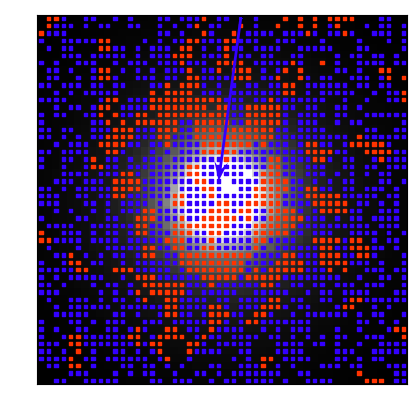

<Figure size 1000x1000 with 0 Axes>

In [83]:
city.show(traces=[965])

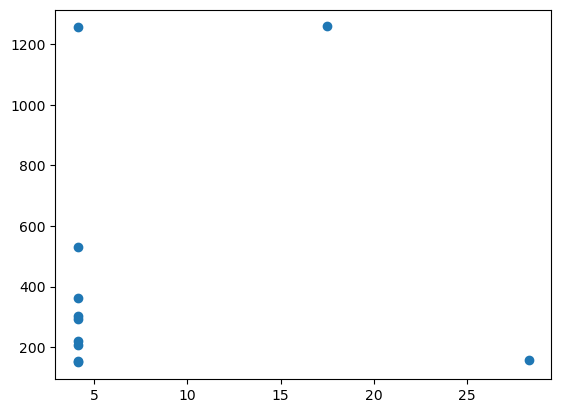

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df["distc"], df["Step"])

In [207]:

def centertown(pos, side):
    center = (side/2,side/2)
    radius= side /10
    return distance(pos,center) < radius+ side/10

In [208]:
side= 50
import numpy as np

for alfabeta in [(0,0), (0,-2), (2,-2)]:
    
    city = SchellingModel(side =side,mobility={"model":"gravity", "alpha":alfabeta[0], "beta":alfabeta[1]},
                           agents_report=True,
                          town=True)
    city.datacollect()


    while city.running:
        city.step()
        
    print(np.mean([distance(e,(side/2,side/2)) for e in city.grid.empties]))
    print(len([e for e in city.grid.empties if centertown(e,side)]))

18.68925138656762
100
19.500973894770564
86
22.570385665565237
12


In [219]:
100/305

0.32786885245901637

In [220]:
86/305

0.2819672131147541

In [221]:
12/305

0.03934426229508197

In [218]:
len([(x,y) for x in range(side) for y in range(side) if centertown((x,y),side)])

305

In [209]:
print(len([e for e in city.grid if centertown(e,side)]))

TypeError: 'NoneType' object is not subscriptable

In [ ]:
unhappy[1][0].pos

In [ ]:
df = city.datacollector.get_agent_vars_dataframe().reset_index()
df = df[df["happy"]==False]
df

In [ ]:
df.groupby("AgentID").max()

In [1]:
import numpy.random as npr
import pandas as pd
import altair as alt
from schellingmob import SchellingAgent, SchellingModel
import math

def maptype(t):
    if t==2:
        return -1
    else:
        return 1
    
def distance(p, q, type="euclid"):
    if type=="euclid":
        return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)
    
def centertown(pos, side):
    center = (side/2,side/2)
    radius= side /10
    return distance(pos,center) < radius+ side/10

final_configs = []
id_plots=[]
intersect_plots = []
count_plots = []
unhappy_map_plots = []

side = 30

for alfabeta in [(0,0), (0,-2), (2,-2)]:
    
    city = SchellingModel(side =side,mobility={"model":"gravity", "alpha":alfabeta[0], "beta":alfabeta[1]},
                           agents_report=True,
                          town=True)
    city.datacollect()


    while city.running:
        city.step()


    source = pd.DataFrame({'x': [x[1] for x in city.grid.coord_iter()], 
                               'y':[x[2] for x in city.grid.coord_iter()], 
                               'score':[x[0].type if x[0]!=None else 0 for x in city.grid.coord_iter()]
                              })

    final_config = alt.Chart(source).mark_rect().encode(x = alt.X('x:O' , axis=None ),
                                                        y = alt.Y('y:O' , axis=None ),
                                                        color = alt.Color('score:Q',legend=None,
                                                                         scale=alt.Scale(domain=[0.9,1,2], 
                                                                         range=["#000000", "#ff3300", "#0033ff"]))
                                                        ).properties(width=300, height=300)
                
    final_configs.append(final_config)
    
    
    ###############################
    
    
    df = city.datacollector.get_agent_vars_dataframe().reset_index()
    max_step = max(df["Step"])
    df = df[df["happy"]==False]
    unhappy = df.groupby("Step").AgentID.unique().apply(lambda l: [a for a in city.schedule.agents if a.unique_id in l])
    x,y,t = [], [], []

    for step in range(max_step):
        x += [step]*len(unhappy[step])
        for a in unhappy[step]:
            y.append(a.unique_id)
            t.append(a.type)
            
            
    source = pd.DataFrame({"Step": x,
                          "AgentId": y,
                          "t": t})
    
    id_plot = alt.Chart(source).mark_circle(size=60).encode(x='Step',
                                                         y='AgentId',
                                                         color=alt.Color('t', legend = None,
                                                          scale=alt.Scale(domain=[1,2], 
                                                        range=["#ff3300", "#0033ff"]))
                                                ).properties(width=300, height=300)   
    
    id_plots.append(id_plot)
    
    ###############################
    
    
    unhappy_map = {(x,y):0 for x in range(side) for y in range(side)}

    
    for l in unhappy.apply(lambda l: [a.pos for a in l]):
        for pos in l:
            unhappy_map[pos] +=1 

    source = pd.DataFrame({'x': [p[0] for p in unhappy_map.keys()],
                                   'y':[p[1] for p in unhappy_map.keys()],
                                   'score':[unhappy_map[p] for p in unhappy_map.keys()]
                                  })

    unhappy_map_plot = alt.Chart(source).mark_rect().encode(x = alt.X('x:O' , axis=None ),
                                                        y = alt.Y('y:O' , axis=None ),
                                                        color = alt.Color('score:Q')
                                                        ).properties(width=300, height=300)

    unhappy_map_plots.append(unhappy_map_plot)

    ###############################


    
    unhappy_df = pd.DataFrame({#"agents": unhappy,
                          "id": unhappy.apply(lambda l: [a.unique_id for a in l]),
                          "count": unhappy.apply(lambda l: len(l))
                          }).reset_index()

    intersect = [None]
    for i in range(1,len(unhappy)):
        A = set(unhappy_df["id"][i])
        B = set(unhappy_df["id"][i-1])
        intersect.append(len(A.intersection(B))/len(A))

    unhappy_df["intersect"] = intersect
    intersect_plot = alt.Chart(unhappy_df).mark_point().encode(x= "Step", 
                                                             y= "intersect"
                                                            ).properties(width=300, height=300)   
    
    count_plot = alt.Chart(unhappy_df).mark_point().encode(x= "Step", 
                                                             y= "count"
                                                            ).properties(width=300, height=300)   
    intersect_plots.append(intersect_plot)
    count_plots.append(count_plot)


(final_configs[0] | final_configs[1] | final_configs[2]).resolve_scale(
    color='independent')& \
(count_plots[0] | count_plots[1] | count_plots[2]).resolve_scale(
    color='independent') & \
(intersect_plots[0] | intersect_plots[1] | intersect_plots[2]).resolve_scale(
    color='independent') & \
(id_plots[0] | id_plots[1] | id_plots[2]).resolve_scale(
    color='independent')  & \
(unhappy_map_plots[0] | unhappy_map_plots[1] | unhappy_map_plots[2]).resolve_scale(
    color='independent') 

alt.VConcatChart(...)

In [50]:
df = pd.DataFrame({"Step": [0,1,2,3], "count": [3,4,3,3]})

alt.Chart(df).mark_point().encode(x= "Step" , y= "count")

alt.Chart(...)

In [51]:
type(df)

pandas.core.frame.DataFrame

alt.Chart(...)

In [ ]:
alt.Chart(unhappy_id).mark_point().encode(x="Miles_per_Gallon", y="Horsepower")